# Section 29: Decision Trees

- online-ds-pt-100719
- 04/07/20


## Questions?:

- 

## Correction:

- When discussing Evaluation Metrics, specifically ROC curves, I misspoke when I said that roc AUC is the based on the overlapping probabilities. If that wer ethe case we would MINIMIZE ROC AUC.
- AUC is actually just area under the ROC curve. The more towards the top-left the curve is, the larger the AUC. So we want to MAXIMIZE ROC AUC

## Learning Objectives

- PAC Learning theory
- Data Partitioning Exercise
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)


# Introduction to Decision Trees

## Decision Trees Overview

- Supervised Learning
- Classification OR Regression

- Interactive Visual Demonstration:
    - http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=70%>


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
- **DISADVANTAGES**
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

## Activity: Data Partitioning

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.19 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
from sklearn.datasets import make_blobs
# plt.rcParams['figure.figsize'] = (10,5)
np.random.seed(27)
plt.style.use('seaborn-talk')

In [3]:
def helper_create_plot(n=300):
    '''
    Create a plot to practice how a decision tree makes its cuts/decisions.
    '''
    X = []
    y = []

    for i in range(n):
        # Generate a random number
        nx = np.random.random()*10
        ny = np.random.random()*10
        X.append((nx,ny))

        if nx > 5:
            if ny > 1:
                y.append(0)
            else:
                y.append(1)
        else:
            if ny > 7:
                y.append(0)
            else:
                y.append(1)

    X = np.array(X)

    f, ax = plt.subplots(1)

    ax.scatter(X[:,0], X[:,1], c=y, s=20, cmap='Set1');
    plt.xticks(range(11));
    plt.xlabel('X1');
    plt.yticks(range(11));
    plt.ylabel('X2');
    
    return f, ax

def create_line(ax, direction, threshold, x_range=(0,10), y_range=(0,10), color='blue'):
    '''
    Creates a vertical or horizontal cut at threshold
    '''
    if direction == 'vertical':
        cut = lambda t: ax.vlines(t,y_range[0], y_range[1], colors=color)
    elif direction == 'horizontal':
        cut = lambda t: ax.hlines(t,x_range[0], x_range[1], colors=color)
    else:
        print('Direction does not exist')
        return
    
    cut(threshold)
    

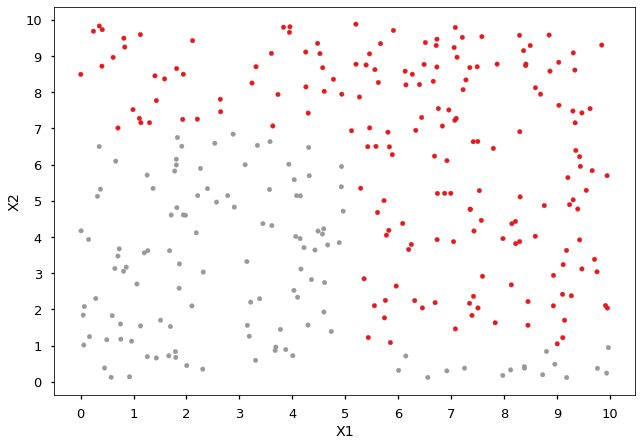

In [4]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [ ]:
# 'horizontal' or 'vertical'
q1_direction = None
# Between 0 and 10
q1_threshold = None

In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

In [ ]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [ ]:
# 'horizontal' or 'vertical'
q2_direction = None
# Between 0 and 10
q2_threshold = None


In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

In [ ]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [ ]:
# 'horizontal' or 'vertical'
q3_direction = None
# Between 0 and 10
q3_threshold = None

In [ ]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

In [ ]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

# Decision Tree Process

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'Information Gain'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

### Splitting Criteria

> In this procedure, all the features are considered and different split points are tried and tested using some __cost function__. The split with the lowest cost is selected. 

There are a couple of algorithms used to build a decision tree:

* __CART (Classification and Regression Trees)__ uses the Gini Index as a metric
* __ID3 (Iterative Dichotomiser 3)__ uses the entropy function and information gain as metrics


### Greedy search

>**We need to determine the attribute that __best__ classifies the training data, and use this attribute at the root of the tree.** At each node, we repeat this process creating further splits, until a leaf node is achieved, i.e., all data gets classified.  

> ***This means we are performing a top-down, greedy search through the space of possible decision trees***

- For ID3 classification trees, we use the "information gain" criteria.  
    - Information gain (IG) measures how much "information" a feature gives us about the class. 


- Decision trees always try to maximize information gain. So, the attribute with the highest information gain will be split on first.


# Entropy and Information Gain


## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 




## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

## TO DO https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-29-decision-trees/entropy-and-information-gain


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$

- measuring the difference in entropy from before the split (an untidy sock drawer) to after the split (a group of white socks and underwear, and a group of non-white socks and underwear).

- Information gain allows us to put a number to exactly how much we've reduced our _uncertainty_ after splitting a dataset $S$ on some attribute, $A$.  The equation for information gain is:

$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 

In the ID3 algorithm, we use entropy to calculate information gain, and then pick the attribute with the largest possible information gain to split our data on at each iteration. 


# Implementation with sklearn

In [57]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [58]:
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null int64
play        14 non-null int64
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [61]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

,outlook,temp,humidity,windy
0,sunny,hot,high,0
1,sunny,hot,high,1
2,overcast,hot,high,0
3,rainy,mild,high,0
4,rainy,cool,normal,0
5,rainy,cool,normal,1
6,overcast,cool,normal,1
7,sunny,mild,high,0
8,sunny,cool,normal,0
9,rainy,mild,normal,0


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [64]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train)

X_train_ohe = encoder.transform(X_train).toarray()
X_test_ohe = encoder.transform(X_test).toarray()

In [65]:
encoder.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([0, 1])]

In [66]:
def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

display(X_train_ohe.head(),X_test_ohe.head())

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
13,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [67]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



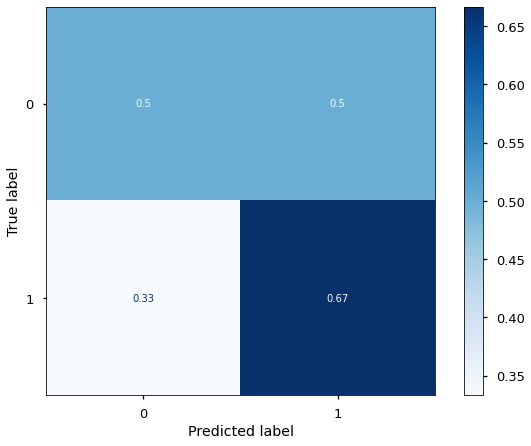

In [68]:
from sklearn import metrics
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe,y_train)

y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

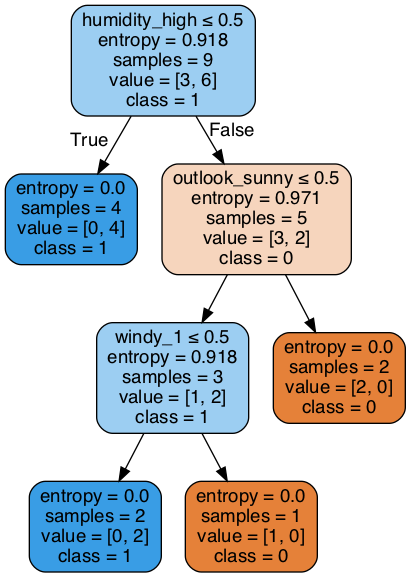

In [69]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [70]:
metrics.accuracy_score(y_test,y_hat_test)

0.6

## Hyper Parameter Tuning with Trees
## TO DO: https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-29-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees


### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

## SEE LABS FROM CLASS FOLDER FOR HYPERPARAMETER TUNING NOTEBOOK

# Questions / Comments